## <a name="0.0"></a>Content (clickable):
* [0. Project description, data description, import libraries](#0.)
* [1. (Step_1) Familiarization with the data:](#1.)
     - [output_1:](#output_1:)
* [2. (Step_2) Prepare data:](#Step_2)
     - [output_2:](#output_2:)
* [3. (Step_3) Data analysis:](#Step_3)
     - [output_3:](#output_3:)
* [4. (Step_4) Portrait of the user of each region:](#Step_4)
     - [output_4:](#output_4:)
* [5. (Step_5) Hypothesis testing:](#Step_5)
     - [output_5:](#Common_output:)
* [5. (Step_6) Common_output:](#Step_6)
     - [Общий_output:](#Общий_output:)

## Project description<a name="0."></a>
<font size="2">([to the content](#0.0))</font>

We need to work out the principle of working with data. It does not matter whether you forecast sales for 2017 according to 2016 data or 2027 according to 2026 data.<br/><br/>
The data set contains the abbreviation <b>ESRB (Entertainment Software Rating Board)</b> — an association that determines the age rating of computer games. <b>ESRB</b> evaluates game content and assigns it a suitable age category, for example, "For adults", "For younger children"

<br/><a name="0."></a>
## Data description
<font size="2">([to the content](#0.0))</font>

* <b>Name</b> — name of game<br/>
* <b>Platform</b> — platform of game<br/>
* <b>Year_of_Release</b> — year of release<br/>
* <b>Genre</b> — genre of games<br/>
* <b>NA_sales</b> — sales in Nord America(millions copies)<br/>
* <b>EU_sales</b></b> — sales in Europe (millions copies)<br/>
* <b>JP_sales</b> — sales in Japan (millions copies)<br/>
* <b>Other_sales</b> — sales in other counties (millions copies)<br/>
* <b>Critic_Score</b> — critics assessment (max 100)<br/>
* <b>User_Score</b> — users assessment (max 10)<br/>
* <b>Rating</b> — rating from the organization ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them a suitable age category.<br/><br/>
Data for 2016 may be incomplete.



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")
import math

<br/><a name="1."></a>
## Step 1. Familiarization with the data
<font size="2">([to the content](#0.0))</font>

In [2]:
try:
    df_1 = pd.read_csv('games.csv', sep=',')
except:
    df_1 = pd.read_csv('/datasets/games.csv', sep=',')

In [3]:
df = df_1.copy()

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод_1:

When you first look at the data, you can say the following:
* 2 passes in the column with the name of the games
* the columns Critic_Score, User_Score, Rating, Year_of_Release have a large number of omissions
* data in the User_Score column of the object type, although they have a numeric format
* Year_of_Release has a float data type, in this case it is logical to change to int
* 75% of the games were released 

## Step_2 <a name="Step_2"></a>
<font size="2">([to the content](#0.0))</font>

Data preparation:
* Prepare the data Replace the column names (lower case);
* Convert data to the desired types. Describe in which columns the data type was replaced and why;
* Process the gaps if necessary: Explain why you filled in the gaps in a certain way or why you did not do it;
* Describe the reasons that could lead to omissions;
* Pay attention to the abbreviation 'tbd' in the rating columns. Separately analyze this value and describe how to process it;
* Calculate the total sales in all regions and record them in a separate column.

In [7]:
df.columns = list(map(lambda x: x.lower(), list(df.columns)))
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

I will delete the lines with omissions in the name of the games, there are only 2 of them, they can be sacrificed

In [8]:
df.drop(df.loc[df['name'].isna() == True].index, inplace = True)

I will replace the type with an integer in the year_of_release column

In [9]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

next, it would be logical to replace the data type of the user_score column with float, but there is one catch - the tbd value occurs in the user_score column, I think in translation it is till before define - not yet defined. Since I need to work with the data from this column for now, I will replace it with NaN. Next, I will bring it to the float type.

In [10]:
df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')

In [11]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [12]:
df['rating'] = df['rating'].fillna('undefined')

I will create a column with total sales

In [13]:
df['common_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

next, I will explore the possibility of filling in the gaps in critic_score and user_score, based on sales. I will check if there is a relationship between sales and ratings

In [14]:
print(df['critic_score'].unique())
print(df['user_score'].unique())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]
[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]


In [15]:
df['common_sales'].describe()

count    16713.000000
mean         0.533315
std          1.548282
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: common_sales, dtype: float64

75% of sales values are located from 0 to 0.47. I'll build graphs, look at the distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdeafece590>]],
      dtype=object)

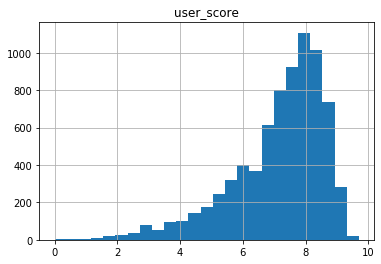

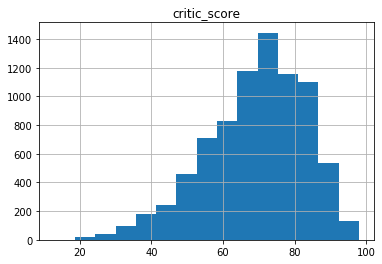

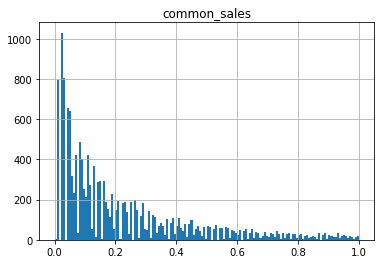

In [16]:
df.hist(column='user_score', bins=25)
df.hist(column='critic_score', bins=15)
df.hist(column = 'common_sales',bins=150, range = (0, 1))

I'll check the data relationships

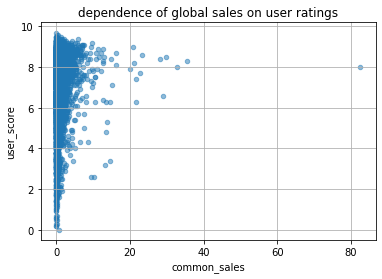

In [17]:
df.plot(x='common_sales', y='user_score', kind='scatter', grid=True, alpha=0.5)
plt.title('dependence of global sales on user ratings')
plt.xlabel('common_sales')
plt.ylabel('user_score')
plt.show()

In [18]:
df.plot(x='common_sales', y='critic_score', kind='scatter', grid=True, alpha=0.5)
plt.title('dependence of global sales on critics' ratings')
plt.xlabel('common_sales')
plt.ylabel('critic_score')
plt.show()

SyntaxError: invalid syntax (<ipython-input-18-ccf5a3218e7c>, line 2)

In [ ]:
df.plot(x='user_score', y='critic_score', kind='scatter', grid=True, alpha=0.5)
plt.title('dependence of the user rating on the critics' rating')
plt.xlabel('user_score')
plt.ylabel('critic_score')
plt.show()

In [ ]:
df['user_score'].corr(df['critic_score'])

In [ ]:
df['common_sales'].corr(df['critic_score'])

In [ ]:
df['user_score'].corr(df['common_sales'])

There are a lot of gaps in the ratings, and the relationship of global sales from them is small enough to focus on it to fill in the gaps in the ratings values, so I will leave the gaps as they are.

### output_2:

- Column headers are reduced to lowercase; 
- Deleted 2 lines with missing values in the name of the games; 
- Processed the tbd value in the user_score clone; 
- I remembered the data types in the column with the year of release on int, in the columns with ratings on float; 
- There are a large number of gaps in the columns with ratings data, their processing is not possible with the available data.

### Step_3 <a name="Step_3"></a>

<font size="2">([to the content](#0.0))</font>

Conduct a research analysis of the data:

- Look at how many games were released in different years. 

- Are the data for all periods important? 

- Look at how sales have changed across platforms. 

- Select the platforms with the highest total sales and build a distribution by year. 

- For what characteristic period of time do new platforms appear and old ones disappear? 

- Take the data for the relevant current period. 

- Determine the current period yourself as a result of the study of previous questions. 

- The main factor is that these data will help to build a forecast for 2017. 

- Do not take into account data for previous years in your work. 

- Which platforms are leading in sales, are they growing or falling? 

- Select several potentially profitable platforms. 

- Build a "box with a mustache" chart on global game sales by platform. 

- Describe the result. 

- See how the reviews of users and critics affect sales within one popular platform. 

- Build a scatter plot and calculate the correlation between reviews, etc.

In [ ]:
df_year_count = df.pivot_table(values = 'name', index = 'year_of_release', aggfunc = 'count')
df_year_count = df_year_count.reset_index()
df_year_count.columns = ['year_of_release', 'count_games']
df_year_count.plot(x='count_games', y='year_of_release', kind='scatter', grid=True, alpha=0.5)
plt.title('years of realise')
plt.xlabel('amount of games')
plt.ylabel('years')
plt.show()

As can be seen from the graph, until 1995, less than 200 games were released per year, for an adequate assessment of the forecast for the present, I will take data from 2001, since this year the number of games produced has become more than 400. But at the same time, for the period from 2010 to 2015, many times fewer games are released annually, we can assume this is due to the development of mobile technologies.

Select the platforms with the highest total sales and build a distribution by year.

In [ ]:
sum_sales_platforms = df.pivot_table(values = 'common_sales', index = 'platform', aggfunc = 'sum')
sum_sales_platforms = sum_sales_platforms.reset_index()
sum_sales_platforms.columns = ['platform', 'sum_sales']
sum_sales_platforms

In [ ]:
sum_sales_platforms.plot(x='platform', y='sum_sales', kind='bar', grid=True, alpha=0.5, figsize = (18,9))
plt.title('common platform sales')
plt.xlabel('sum_sales')
plt.ylabel('platform')
plt.show()

as can be seen from the graph, there are 6 platforms, the total sales of which significantly exceed the sales of other platforms. I will make a threshold value of 400 and build a distribution by year for platforms with sales exceeding the threshold value.

In [ ]:
success_platforms = list(sum_sales_platforms.query('sum_sales > 400')['platform'])
for i in success_platforms:
    df_sales_plat_years = df.loc[df['platform'] == i].pivot_table(values = 'common_sales', index = 'year_of_release', aggfunc = 'sum').reset_index()
    df_sales_plat_years.plot(x='year_of_release', y='common_sales', kind='bar', grid=True, alpha=0.5, figsize = (5,5))
    plt.title(f'distribution of platform sales {i} by year')
    plt.xlabel('sales')
    plt.ylabel('year')
    plt.show()
    
    

as you can see, the distribution of sales by year for platforms has a pronounced growth, peak and drop in sales.

In [ ]:
df.plot(x='platform', y='common_sales', kind='scatter', grid=True, alpha=0.5, figsize = (18,9))
plt.title('platform sales')
plt.xlabel('platform')
plt.ylabel('common_sales')
plt.show()

In [ ]:
df.plot(x='platform', y='year_of_release', kind='scatter', grid=True, alpha=0.5, figsize = (18,9))
plt.title('release of games by platforms by year')
plt.xlabel('platform')
plt.ylabel('year_of_release')
plt.show()

As you can see from the graph, platforms do not live forever, I will calculate their average life span. It is also interesting to look at emissions.

In [ ]:
df.loc[(df['platform'] == 'DS') & (df['year_of_release'] < 2000)]

In [ ]:
df.loc[(df['platform'] == 'Wii') & (df['year_of_release'] < 2005)]

In [ ]:
df.loc[(df['platform'] == '3DS') & (df['year_of_release'] < 2005)]

In [ ]:
df.loc[(df['platform'] == 'PC') & (df['year_of_release'] < 1990)]

In [ ]:
df.loc[(df['platform'] == '2600') & (df['year_of_release'] > 1990)]

In [ ]:
df.loc[(df['platform'] == 'PSV') & (df['year_of_release'] < 2005)]

In [ ]:
platforms = list(df['platform'].unique())
periods_of_platforms = []
for i in platforms:
    last = df['year_of_release'].loc[df['platform'] == i].max()
    first = df['year_of_release'].loc[df['platform'] == i].min()
    periods_of_platforms.append(last-first)
print(f'the average life expectancy of gaming platforms: {np.mean(periods_of_platforms)} years; median:{np.median(periods_of_platforms)} years')
    

In [ ]:
periods_of_platforms = []
for i in success_platforms:
    last = df['year_of_release'].loc[df['platform'] == i].max()
    first = df['year_of_release'].loc[df['platform'] == i].min()
    periods_of_platforms.append(last-first)
print(f'average life expectancy of successful gaming platforms: {np.mean(periods_of_platforms)} years; median: {np.median(periods_of_platforms)} years')
    

According to calculations, gaming platforms live about 6-7 years, but successful platforms live 3-5 years longer

So, next, I will use the data for the last 3 (the average between all and successful platforms) years to make a forecast for 2017.

In [ ]:
df_last_8 = df.loc[(df['year_of_release'] >= 2013) & (df['year_of_release'] < 2016)]
df_last_8.info()

In [ ]:
df_last_8.plot(x='platform', y='common_sales', kind='scatter', grid=True, alpha=0.5, figsize = (18,9))
plt.title('sales of platform')
plt.xlabel('platform')
plt.ylabel('common_sales')
plt.show()

In [ ]:
leader_platforms = df_last_8['platform'].loc[df_last_8['common_sales'] > 10].unique()
print(f'The graph shows that the following platforms have been the leaders in sales over the past  years {leader_platforms}')

In [ ]:
#success_platforms_last_8_years = list(leader_platforms)
platforms_last_8_years = df_last_8['platform'].unique()
for i in platforms_last_8_years:
    df_sales_plat_years = df_last_8.loc[(df['platform'] == i) & (df['year_of_release'] >= 2013)].pivot_table(values = 'common_sales', index = 'year_of_release', aggfunc = 'sum').reset_index()
    df_sales_plat_years.plot(x='year_of_release', y='common_sales', kind='bar', grid=True, alpha=0.5, figsize = (5,5))
    plt.title(f'distribution of platform sales {i} by year')
    plt.xlabel('sales')
    plt.ylabel('year')
    plt.show()

the charts show that sales on all platforms except PS4 are falling

In [ ]:
#platforms_last_10_years = list(df_last_10['platform'].unique())
success_platforms_last_8_years = list(leader_platforms)
for i in success_platforms_last_8_years:
    #df_sales_plat_years = df_last_10.loc[df['platform'] == i].pivot_table(values = 'common_sales', index = 'year_of_release', aggfunc = 'sum').reset_index()
    df_last_8.loc[df['platform'] == i].boxplot(column='common_sales',  by='platform', grid=True, figsize=(5,5))
    plt.ylim([0, 3])
    plt.title(f'global platform sales {i}')
    plt.show()

In [ ]:
df_last_8.loc[df_last_8['platform'].isin(list(platforms_last_8_years))].boxplot(
    column='common_sales',  
    by='platform', 
    grid=True, 
    figsize=(10,10))
plt.ylim([0, 3])
plt.title('global sales of popular platforms')
plt.show()

The median value of sales for successful platforms is in the approximate range from 0.2 to 0.35. The DS platform has the lowest sales, the PS4 has the highest, and the XOne platform also has very good sales

In [ ]:
df_last_8.loc[df_last_8['platform'] == 'PS4'].plot(
    x='common_sales', 
    y='user_score', 
    kind='scatter', 
    grid=True, 
    alpha=0.5,  
    figsize = (12,7))
plt.title('graph of the dependence of total sales on the user rating')


In [ ]:
df_last_8.loc[df_last_8['platform'] == 'PS4'].info()

In [ ]:
df_sales_PS4 = df_last_8.loc[(df_last_8['platform'] == 'PS4') & (df_last_8['user_score'].notna())]

In [ ]:
df_sales_PS4.info()

In [ ]:
df_sales_PS4.plot(x='common_sales', y='user_score', kind='scatter', grid=True, alpha=0.5, legend=i, figsize = (12,7))

In [ ]:
print(df_sales_PS4['user_score'].corr(df_sales_PS4['common_sales']))

On the most popular platform, the correlation coefficient for sales indicators and user ratings is only 0.024, which indicates a weak linear relationship between these indicators.

In [ ]:
print(df_sales_PS4['critic_score'].corr(df_sales_PS4['common_sales']))

On the most popular platform, the correlation coefficient for sales indicators and the critics' rating is 0.43, which indicates an average linear relationship between these indicators

In [ ]:
df_last_8.plot(x='common_sales', y='user_score', kind='scatter', grid=True, alpha=0.5, legend=i, figsize = (12,7))

In [ ]:
print(df_last_8['common_sales'].corr(df_last_8['user_score']))

on other platforms, the linear relationship between user ratings and sales is also very small

In [ ]:
print(df_last_8['critic_score'].corr(df_last_8['user_score']))

but on other platforms, the linear relationship between the critics' rating and sales is already quite significant.

In [ ]:
df_genres = df_last_8.pivot_table(values = 'name', index = 'genre', aggfunc = 'count').reset_index()
df_genres.columns = ['genre', 'count']
df_genres.plot(x='genre', y='count', kind='bar', grid=True, alpha=0.5, figsize = (9,5))
plt.title(f'distribution of games by genre')
plt.xlabel('genre')
plt.ylabel('count')
plt.show()

In [ ]:
df_genres_sales = df_last_8.pivot_table(values = 'common_sales', index = 'genre', aggfunc = 'sum').reset_index()
df_genres_sales.columns = ['genre', 'common_sales']
df_genres_sales.plot(x='genre', y='common_sales', kind='bar', grid=True, alpha=0.5, figsize = (9,5))
plt.title(f'distribution of sales by genre')
plt.xlabel('genre')
plt.ylabel('common_sales')
plt.show()

In [ ]:
df_genres_sales = df_last_8.pivot_table(values = 'common_sales', index = 'genre', aggfunc = 'median').reset_index()
df_genres_sales.columns = ['genre', 'common_sales']
df_genres_sales.plot(x='genre', y='common_sales', kind='bar', grid=True, alpha=0.5, figsize = (9,5))
plt.title(f'median distribution of sales by genre')
plt.xlabel('genre')
plt.ylabel('common_sales')
plt.show()

### output_3:

- A graph of the release of games by year has been built, which shows that less than 200 games were released per year before 1995, for an adequate assessment of the forecast for the present, I will take data starting from 2007, since this year the number of games released has become more than 400. But at the same time, for the period from 2010 to 2015, many times fewer games are released annually.

- It was revealed that the average life expectancy of gaming platforms is about 8 years, for popular platforms this indicator is 5 years longer.

- Sales of games from popular platforms are falling.

- The relationship between sales and user ratings is weak

- The relationship between sales and critics' ratings is quite strong

- Popular genres have been identified: Action, Shooter and Sports 

- Most sales in the genre t: Shooter

### Step_4 <a name="Step_4"></a>
<font size="2">([to the content](#0.0))</font>

Create a portrait of the user of each region:

- Define for the user of each region (NA, EU, JP): 

- The most popular platforms (top 5). 

- Describe the differences in sales shares. 

- The most popular genres (top 5). 

- Explain the difference. 

- Does the ESRB rating affect sales in a particular region?

In [ ]:
regions = {'Nord_America':'na_sales', 'Europe':'eu_sales', 'Japan':'jp_sales'}
for i in regions:
    j = regions[i]
    df_region_user_platform = df_last_8.pivot_table(
        values = j, 
        index = 'platform', 
        aggfunc = 'sum'
    ).reset_index().sort_values(j, ascending=False)
    df_region_user_genre = df_last_8.pivot_table(
        values = j, 
        index = 'genre', 
        aggfunc = 'sum'
    ).reset_index().sort_values(j, ascending=False)
    platforms_of_region_pop = ', '.join(list(df_region_user_platform['platform'][0:5]))
    genres_of_region_pop = ', '.join(list(df_region_user_genre['genre'][0:5]))
    print(f'For {i}, the top five most popular platforms are as follows: {platforms_of_region_pop};')
    print(f'For {i}, the top five most popular genres are as follows: {genres_of_region_pop};')

In [ ]:
regions = {'Nord_America':'na_sales', 'Europe':'eu_sales', 'Japan':'jp_sales'}
for i in regions:
    j = regions[i]
    df_region_rating = df_last_8.pivot_table(
        values = j, 
        index = 'rating', 
        aggfunc = 'sum'
    ).reset_index().sort_values(j, ascending=False)
    df_region_rating.plot(
        x='rating', 
        y=j, 
        kind='bar', 
        grid=True, 
        alpha=0.5, 
        figsize = (12,7))
    plt.title(f'distribution of sales by ESRB rating in {i}')
    plt.xlabel('rating ESRB')
    plt.ylabel('common sales')
    plt.show()

### output_4:

- For Nord_America, the top five most popular platforms are as follows: X360, PS3, Wii, DS, PS4;
- For Nord_America, the top five most popular genres are as follows: Action, Shooter, Sports, Misc, Role-Playing;
- For Europe, the top five most popular platforms are as follows: PS3, X360, Wii, PS4, PC;
- For Europe, the top five most popular genres are as follows: Action, Shooter, Sports, Misc, Role-Playing;
- For Japan, the top five most popular platforms are as follows: 3DS, DS, PS3, PSP, Wii;
- For Japan, the top five most popular genres are as follows: Role-Playing, Action, Misc, Sports, Platform;

- The biggest sales in North America are games with an "E" rating, in Europe with an "M" rating, but in Japan, it seems, they don't really like to assign an age rating to games, since such unrated games are sold the most here.

## Step_5 <a name="Step_5"></a>
<font size="2">([to the content](#0.0))</font>

Check the hypotheses:

1. The average user ratings of the Xbox One and PC platforms are the same; 

2. Average user ratings of genres Action (English "action", action games) and Sports (English "sports competitions") are different. 

- Set the alpha threshold value yourself. 


Explain: 
- How did you formulate the null and alternative hypotheses; 
- What criteria were used to test hypotheses and why.

5.1
- null hypothesis: The average user ratings of the Xbox One and PC platforms are the same;

- alternative hypothesis: The average user ratings of the Xbox One and PC platforms are not the same

In [ ]:
alpha = 0.05
user_score_XB = df_last_8.loc[(df_last_8['platform'] == "XOne") & (df_last_8['user_score'] > 0)]['user_score'] 
user_score_PC = df_last_8.loc[(df_last_8['platform'] == "PC") & (df_last_8['user_score'] > 0)]['user_score']
results = st.ttest_ind(user_score_XB, user_score_PC)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('It was not possible to reject the null hypothesis') 

In [ ]:
user_score_XB.mean()

In [ ]:
user_score_PC.mean()

In this case, it was not possible to reject the null hypothesis, which means: the average user ratings of the Xbox One and PC platforms are the same

5.2 


- null hypothesis: Average user ratings of the genres Action (English "action", action games) and Sports (English "sports competitions") similar;

- alternative hypothesis: Average user ratings of genres Action (English "action", action games) and Sports (English "sports competitions") different

In [ ]:
alpha = 0.05
user_score_Action = df_last_8['user_score'].loc[(df_last_8['genre'] == "Action") & (df_last_8['user_score'] > 0)] 
user_score_Sports = df_last_8['user_score'].loc[(df_last_8['genre'] == "Sports") & (df_last_8['user_score'] > 0)]
results = st.ttest_ind(user_score_Action, user_score_Sports)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('It was not possible to reject the null hypothesis') 

In [ ]:
print(user_score_Action.mean(), user_score_Sports.mean())

In this case, an alternative hypothesis turned out to be true: The average user ratings of the Xbox One and PC platforms are not the same

### output_5:

* The null hypothesis always speaks of the equality of the studied quantities, while the alternative hypothesis speaks of their difference.
* The threshold value alpha = 0.05 was taken as the most common value for the study.

## Step_6 <a name="Step_6"></a>
<font size="2">([to the content](#0.0))</font>

Write a general conclusion

### Common_output:

- the main conclusion of this study is that sales of platforms are falling and are likely to continue their decline, as they have been replaced by the mobile device market; 
- sales are more influenced by the ratings of critics than users;
- significant differences in the popularity of platforms were revealed in Japan compared to other regions. Therefore, it is necessary to develop a separate marketing company for Japan.